## 1. Import libraries and preprocess datasets

Credits: [rubikscode.net](https://rubikscode.net/2019/07/08/deep-q-learning-with-python-and-tensorflow-2-0/)

In [15]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
from collections import deque
import numpy as np
import random
import gym

streets = gym.make("Taxi-v3").env
streets.render()

states_n = enviroment.observation_space.n
actions_n = enviroment.action_space.n

print(f'Number of states: {states_n}')
print(f'Number of actions: {actions_n}')

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Number of states: 500
Number of actions: 6


## 2. Create the agent

<img src="https://i1.wp.com/rubikscode.net/wp-content/uploads/2019/07/rdq.jpg?w=772&ssl=1" width="400" height="auto" />

<img src="https://i1.wp.com/rubikscode.net/wp-content/uploads/2019/07/networks-1.jpg?w=627&ssl=1" width="400" height="auto" />

(Source: [rubikscode.net, 2019](https://rubikscode.net/2019/07/08/deep-q-learning-with-python-and-tensorflow-2-0/))

In [63]:
def create_model():
    model = Sequential()
    model.add(Embedding(states_n, 10, input_length=1))
    model.add(Reshape((10,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(actions_n, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
    return model

def align_target_model(target, q):
    target.set_weights(q.get_weights())
    
q_network = create_model()
target_network = create_model()

align_target_model(target_network, q_network)

## 3. Train the agent

In [46]:
# Parameters
gamma = 0.6
epsilon = 0.1

batch_size = 2000 # 32
episodes_n = 25 # 100
timesteps_per_ep = 50 # 1000

experience_replay = deque(maxlen=2000)
episode_steps = []

for ep in range(0, episodes_n):
    state = enviroment.reset()
    state = np.reshape(state, [1, 1])
    reward = 0
    terminated = False
    ep_steps = timesteps_per_ep
    
    print(f'Episode {ep + 1}')
    
    for t in range(timesteps_per_ep):
        # Agent starts acting on an action (using ε-greedy)
        action = streets.action_space.sample() if np.random.rand() <= epsilon else np.argmax(q_network.predict(state)[0])
        
        # Agent starts taking the action  
        next_state, reward, terminated, _ = enviroment.step(action)
        next_state = np.reshape(next_state, [1, 1])
        
        # Append past experience to retrain
        experience_replay.append((state, action, reward, next_state, terminated))
        state = next_state
        
        if terminated:
            # Copy parameters to target network
            align_target_model(target_network, q_network)
            ep_steps = t
            break

        # Pick random samples from the experience replay memory and train the Q-Network
        if len(experience_replay) > batch_size:
            sample_batch = random.sample(experience_replay, batch_size)

            for state, action, reward, next_state, terminated in sample_batch:
                target = q_network.predict(state)

                if terminated:
                    target[0][action] = reward

                else: 
                    target[0][action] = reward + gamma * np.amax(target_network.predict(next_state))

                q_network.fit(state, target, epochs=1, verbose=0)
                
    streets.render()
    episode_steps.append(ep_steps)
    print(f'Completed with {ep_steps} steps\n\n')

Episode 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 7
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 8
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Completed with 50 steps


Episode 9
+---------+
|R: | : :G

## 4. Display details

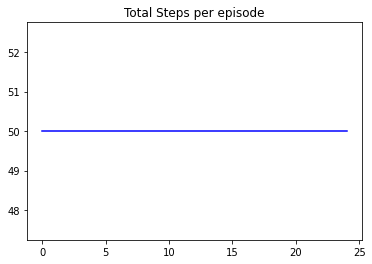

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 1, 10)             5000      
_________________________________________________________________
reshape_20 (Reshape)         (None, 10)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_62 (Dense)             (None, 6)                 306       
Total params: 8,406
Trainable params: 8,406
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
Layer (type)                

In [61]:
import matplotlib.pyplot as plt

# Graph is not accurate and model isn't well-trained since the batch size is huge and the steps as well.
# For illustration and conceputal purposes.
plt.plot(np.arange(episodes_n), episode_steps, color='blue')
plt.title('Total Steps per episode')
plt.show()

q_network.summary()
target_network.summary()

print(len(q_network.weights), q_network.weights[0].shape)
print(f"""Weights dimension,
    Q-network: {len(q_network.weights)} × {q_network.weights[0].shape},
    target network: {len(target_network.weights)} × {target_network.weights[0].shape}
""")

print('Q-network weights item [0][0]\n', q_network.weights[0][0], '\n')
print('Target network weights item [0][0]\n', target_network.weights[0][0], '\n')